In [1]:
%pylab inline

from styles import *
import os
import itertools as it

Populating the interactive namespace from numpy and matplotlib


In [2]:
odir = os.path.expandvars("$HOME/Projects/J-PAS/j-pas_challenge/outs")

jpas_z0p21 = genfromtxt("{}/jpas-z0p21/jpas-z0p21-output.log".format(odir), dtype=None, names=True)
jpas_z0p50 = genfromtxt("{}/jpas-z0p50/jpas-z0p50-output.log".format(odir), dtype=None, names=True)
jpas_z0p90 = genfromtxt("{}/jpas-z0p90/jpas-z0p90-output.log".format(odir), dtype=None, names=True)

jplus_z0p21 = genfromtxt("{}/jplus-z0p21/jplus-z0p21-output.log".format(odir), dtype=None, names=True)
jplus_z0p50 = genfromtxt("{}/jplus-z0p50/jplus-z0p50-output.log".format(odir), dtype=None, names=True)
jplus_z0p90 = genfromtxt("{}/jplus-z0p90/jplus-z0p90-output.log".format(odir), dtype=None, names=True)

jpas_obs = genfromtxt("{}/obs-seds/jpas/jpas-obs-output.log".format(odir), dtype=None, names=True)
jplus_obs = genfromtxt("{}/obs-seds/jplus/jplus-obs-output.log".format(odir), dtype=None, names=True)

kws = list(jpas_z0p21.dtype.names)[2:]

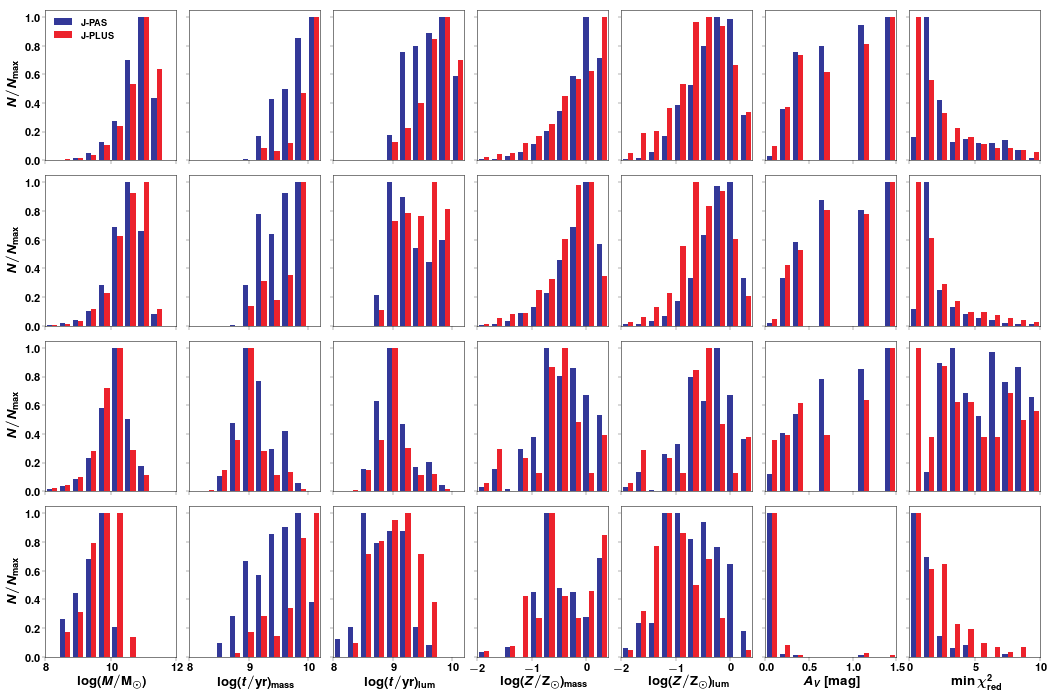

In [3]:
nb = 10
xlims = (8.0,12.0), (8.0,10.2), (8.0,10.2), (-2.0,0.4), (-2.0,0.4), (0.0,1.5), (0.0,10.0)
xlabs = r"\bf $\log(M/\text{M}_\odot)$", r"\bf $\log(t/\text{yr})_\text{mass}$", r"\bf $\log(t/\text{yr})_\text{lum}$", r"\bf $\log(Z/\text{Z}_\odot)_\text{mass}$", r"\bf $\log(Z/\text{Z}_\odot)_\text{lum}$", r"\bf $A_V$ [mag]", r"\bf $\min{\chi^2_\text{red}}$"

tables = (jpas_z0p21,jplus_z0p21), (jpas_z0p50,jplus_z0p50), (jpas_z0p90,jplus_z0p90), (jpas_obs,jplus_obs)

fig, axs = subplots(len(tables), len(kws), sharey=True, sharex="col", figsize=(15,10))

for i,j in it.product(xrange(axs.shape[0]), xrange(axs.shape[1])):
    t1, t2 = tables[i]

    w1 = 1.0/histogram(t1[kws[j]] if kws[j]!="M_mod" else log10(t1[kws[j]]), nb, range=xlims[j])[0].max().repeat(t1.size)
    w2 = 1.0/histogram(t2[kws[j]] if kws[j]!="M_mod" else log10(t2[kws[j]]), nb, range=xlims[j])[0].max().repeat(t2.size)
    
    axs[i,j].hist([t1[kws[j]],t2[kws[j]]] if kws[j]!="M_mod" else [log10(t1[kws[j]]),log10(t2[kws[j]])], nb, range=xlims[j], lw=0, weights=(w1,w2), color=("#333898","#EC222C"), label=(r"\bf J-PAS",r"\bf J-PLUS"))
    axs[i,j].set_xlim(xlims[j])
    if axs[i,j].is_last_row(): axs[i,j].set_xlabel(xlabs[j])
    if axs[i,j].is_first_col(): axs[i,j].set_ylabel(r"\bf $N/N_\text{max}$")

axs[0,0].legend(loc=0)

fig.tight_layout()
fig.subplots_adjust(wspace=0.1,hspace=0.1)
fig.savefig("img/dynbas-results.pdf")